In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/explicitimplicitv5/explicit-implicit-v5.csv
/kaggle/input/explicitimplicitv5/explicit-implicit-v6.csv
/kaggle/input/entrp-srch/ENTRP-SRCH-v14.txt
/kaggle/input/entrp-srch/dataset-with-urls.txt


**This script performs a correlation between two implicit (click-though data) and explicit (human relevance judgement) feedback for an Enterprise Search (ES) service that uses Learning to Rank (LTR)**

In [2]:
#!pip3 install -U datapane >/dev/null 2>&1

In [3]:
#!pip3 install -U jinja2

In [4]:
import seaborn as sns
import altair as alt 
import pandas as pd


#exim=pd.read_csv("/kaggle/input/explicitimplicitv5/explicit-implicit-v6.csv")

exim=pd.read_csv("/kaggle/input/entrp-srch/ENTRP-SRCH-v14.txt",sep='\s+', header=None, names=["HUMAN", "QID", "BM25", "RECENCY", "CONTACT", "ABOUT", "RAWHITS","URL-LEN","LINKRANK","CTR-6"])

In [5]:
exim['CTR-6'] = exim['CTR-6'].str[2:]

In [6]:
#exim["HUMAN"] = pd.to_numeric(exim["HUMAN"])
# convert just columns "a" and "b"
exim[["HUMAN", "CTR-6"]] = exim[["HUMAN", "CTR-6"]].apply(pd.to_numeric)


In [7]:
#exim = exim.dropna()


In [8]:
exim.head(15)

,HUMAN,QID,BM25,RECENCY,CONTACT,ABOUT,RAWHITS,URL-LEN,LINKRANK,CTR-6
0,5,qid:1,1:7.901979,2:0.17024133,3:0.0,4:0.0,5:34.0,6:6.0,7:1.080049,0.190
1,3,qid:1,1:7.886458,2:0.24574098,3:0.0,4:0.0,5:22.0,6:8.0,7:0.42990547,0.040
2,4,qid:1,1:6.097526,2:0.30741006,3:0.0,4:0.0,5:22.0,6:7.0,7:0.4299054,0.030
3,5,qid:1,1:8.518949,2:0.30792695,3:0.0,4:1.0,5:4.0,6:7.0,7:0.42990547,0.090
4,3,qid:1,1:4.9042683,2:0.31480822,3:0.0,4:0.0,5:22.0,6:9.0,7:0.42990544,0.000
5,5,qid:1,1:8.338974,2:0.3061254,3:1.0,4:0.0,5:1.0,6:7.0,7:0.42990547,0.040
6,5,qid:1,1:7.886458,2:0.13792998,3:0.0,4:0.0,5:4.0,6:7.0,7:0.17706141,0.170
7,3,qid:1,1:6.806793,2:0.3068949,3:0.0,4:0.0,5:8.0,6:7.0,7:0.4299054,0.001
8,3,qid:1,1:7.7742815,2:0.20971979,3:0.0,4:0.0,5:6.0,6:8.0,7:0.42990547,0.040
9,4,qid:1,1:6.4255433,2:0.24574098,3:0.0,4:0.0,5:10.0,6:8.0,7:0.42990547,0.060


In [9]:
exim.count()

HUMAN       2554
QID         2554
BM25        2554
RECENCY     2554
CONTACT     2554
ABOUT       2554
RAWHITS     2554
URL-LEN     2554
LINKRANK    2554
CTR-6       2554
dtype: int64

In [10]:
#  USE CTR AS BASELINE
# eclude those documents that have no (NULL) CTR score when using ENTRP-SRCH dataset
#exim = exim[exim["CTR-6"] != 0.00]   

In [11]:
print("The total number of data points in the plot is",len(exim.index))
#exim.count()
#exim.describe

The total number of data points in the plot is 2554


In [12]:
#exim.describe

In [13]:
#exim.info

In [14]:
nrows = exim.loc[(exim['HUMAN'] == 5) & (exim['CTR-6'] == 0.00)]
#nrows = exim.loc[(exim['HUMAN'] == 5) & (exim['CTR-6'] == 0.001)]
nrows.count()
#nrows

HUMAN       8
QID         8
BM25        8
RECENCY     8
CONTACT     8
ABOUT       8
RAWHITS     8
URL-LEN     8
LINKRANK    8
CTR-6       8
dtype: int64

In [15]:
import seaborn as sns

import matplotlib.pyplot as plt


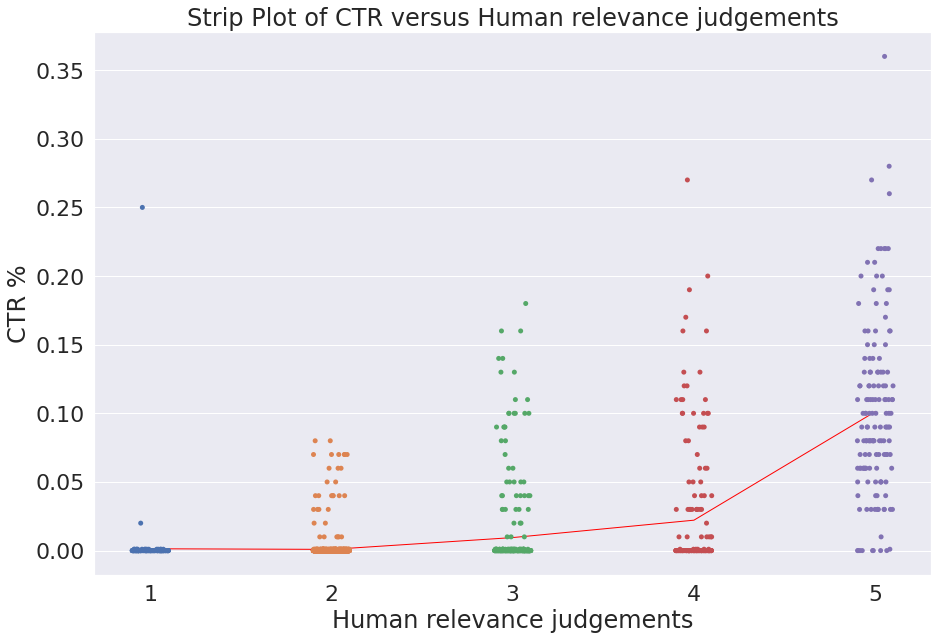

In [16]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale=2)
fig, ax, = plt.subplots()

# need to subtract 1 for lineplot to use same range as stripplot
# https://stackoverflow.com/questions/53986627/stripplot-and-lineplot-weird-result
x2 = (exim['HUMAN']-1)

sns_plot = sns.stripplot(x = 'HUMAN', y = 'CTR-6', data = exim, ax =ax).set(title='Strip Plot of CTR versus Human relevance judgements',xlabel='Human relevance judgements',ylabel='CTR %')
sns_plot = sns.lineplot(x = x2, y = 'CTR-6', data = exim, ax=ax, color='red', linewidth=1, ci=None)



In [17]:
# save file
sns_plot.figure.savefig("/kaggle/working/strip-plot-with-line.png")
#!ls -lrt /kaggle/working


[Text(0.5, 1.0, 'Box Plot of CTR versus Human relevance judgements'),
 Text(0.5, 0, 'Human relevance judgements'),
 Text(0, 0.5, 'CTR %')]

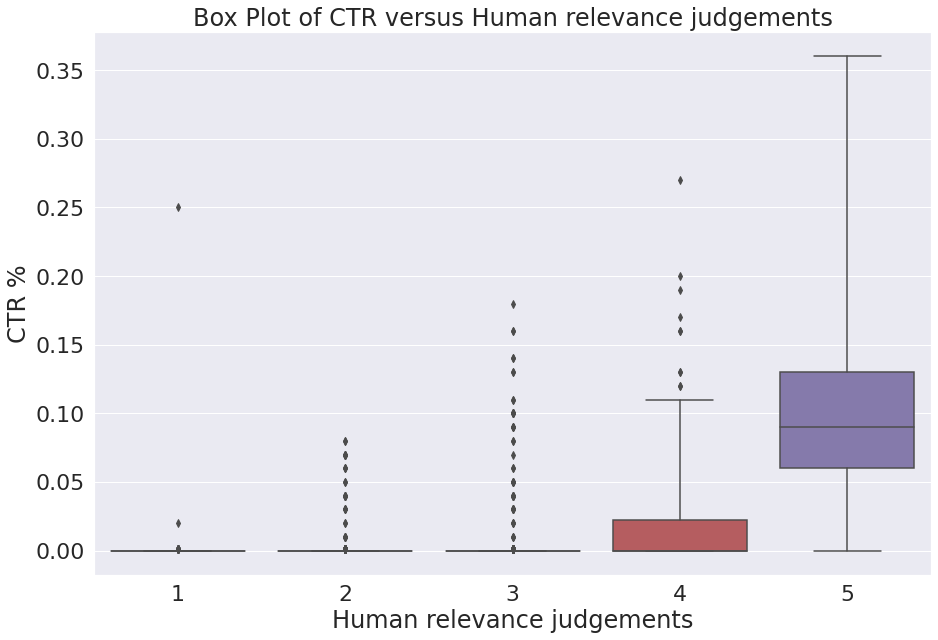

In [18]:
sns.boxplot(x = 'HUMAN', y = 'CTR-6', data = exim, whis=4).set(title='Box Plot of CTR versus Human relevance judgements',xlabel='Human relevance judgements',ylabel='CTR %')


In [19]:
!pip3 install scipy

In [20]:
from scipy.stats import ttest_rel

In [21]:
#exim.rename(columns={'HUMAN':'','CTR-6:''})

# Interpreting the Correlation Coefficient
If we wish to label the strength of the association, for absolute values of r, Evans (1996) suggest the following (arbitrary) thresholds can be applied; -
* 0-0.19 is regarded as very weak, 
* 0.2-0.39 as weak, 
* 0.40-0.59 as moderate, 
* 0.6-0.79 as strong and 
* 0.8-1 as very strong correlation


# Pearson versus Spearman
Pearson coefficient measures linear trend, 
Spearman coeffiecient measures monotonic trend

In [22]:

# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
from scipy.stats import spearmanr
# seed random number generator
seed(1)
# prepare data

In [23]:
data1 = exim['HUMAN']
data2 = exim['CTR-6']

data1 = data1.dropna()
data2 = data2.dropna()

# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearson\'s correlation:  human v click-through-rate: %.3f' % corr)

Pearson's correlation:  human v click-through-rate: 0.586


In [24]:
data1 = exim['HUMAN']
data2 = exim['CTR-6']

data1 = data1.dropna()
data2 = data2.dropna()

from scipy.stats import spearmanr
corr, _ = spearmanr(data1, data2)
print('Spearman\'s correlation:  human v click-through-rate: %.3f' % corr)

Spearman's correlation:  human v click-through-rate: 0.437


In [25]:
# calculate spearman's correlation
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
print ('p-value',p)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.437
p-value 1.6350135746535322e-119
Samples are correlated (reject H0) p=0.000
